# Workbook 00 - Solving beams with `PyNite`

In [10]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

![image.png](attachment:89fe97d6-ef15-48d2-a2f3-ad1c5a8d1abb.png)

The beam is to have the following attributes:

```
Material:
    Steel: E=23000 MPa, nu=0.2, G=9585 MPa, rho=7.55e-5
Section:
    Iz = 400e6 mm**4
    The other parameters (J, A, Iy) can be whatever you wish since we are only analyzing this beam in flexure in the gravity direction
```

* Use `print()` to print the reactions
* Plot the shear diagram
* Plot the moment diagram

## Task 01 Response

Left Support Reaction: {'LC1': 15176.538461538461} kN
Right Support Reaction: {'LC1': -4496.538461538461} kN


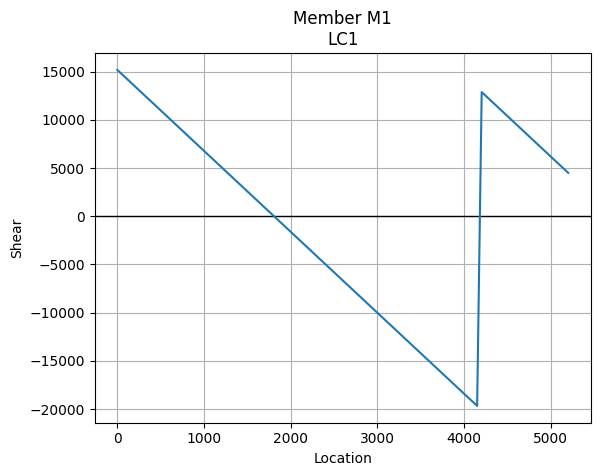

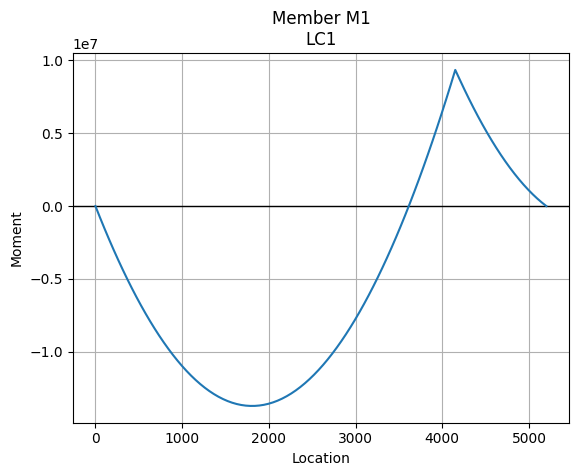

In [32]:
# This is me completing the workbook
# Create a model
beam_model_task01 = FEModel3D()

# Add a material
E = 23000      # Modulus of elasticity (MPa)
G = 9585       # Shear modulus of elasticity (MPa)
rho = 7.55e-5   # Density
nu = 0.3        # Poisson's ratio
beam_model_task01.add_material('Steel', E, G, nu, rho)

# Add nodes
beam_model_task01.add_node("node1", 0, 0, 0)
beam_model_task01.add_node("node2", 5200, 0, 0)

# Add members
beam_model_task01.add_member("M1", "node1", "node2", "Steel", Iy = 20e6, Iz = 400e6, J=30e3, A=1500)

# Define supports
beam_model_task01.def_support("node1", True, True, True, True, True, False)
beam_model_task01.def_support("node2", False, True, True, True, True, False)

# Load combinations
beam_model_task01.add_load_combo("LC1", {"D": 1.0, "L": 1.0})

# Add member loads
beam_model_task01.add_member_dist_load("M1", "Fy", w1=-8.4, w2=-8.4, x1=0, x2=5200, case="D")

beam_model_task01.add_member_pt_load("M1", "Fy", P=33000, x=4150, case="L")

# Display member forces
beam_model_task01.analyze()

# Display node reactions
print('Left Support Reaction:', beam_model_task01.Nodes['node1'].RxnFY, 'kN')
print('Right Support Reaction:', beam_model_task01.Nodes['node2'].RxnFY, 'kN')

# Plot Shear Diagram
beam_model_task01.Members['M1'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)

# Plot Moment Diagram
beam_model_task01.Members['M1'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. For PyNite, you will also need $\nu$, G, and $\rho$. Use `0.2`, `9585` MPa, and `2.4e-5` N/mm**3 for these values, respectively. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

Left Support Reaction: {'LC1': 56551.99999999999} kN


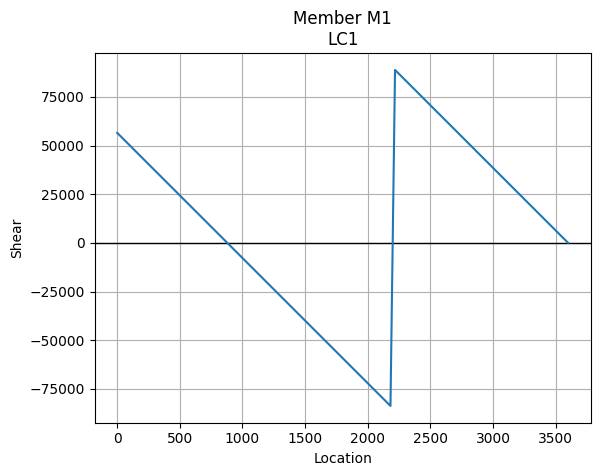

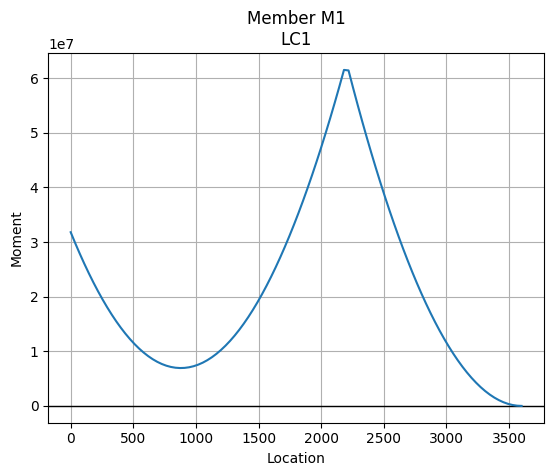

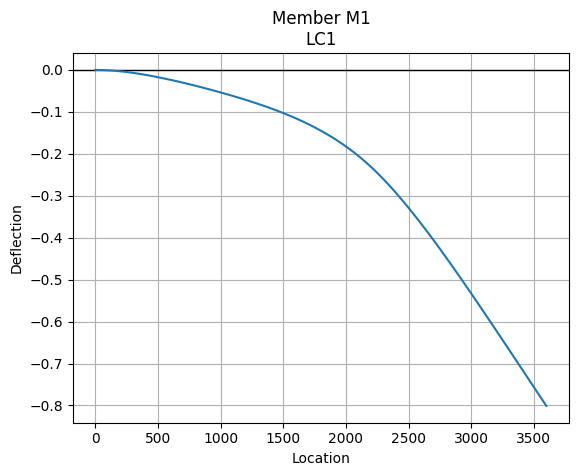

In [38]:
# This is me completing the workbook
# Create a model
beam_model_task02 = FEModel3D()
b = 300
d = 600
# Add a material
E = 4700* 45**0.5  # Modulus of elasticity (MPa)
G = 9585       # Shear modulus of elasticity (MPa)
rho = 2.4e-5   # Density
nu = 0.2        # Poisson's ratio
beam_model_task02.add_material('Concrete', E, G, nu, rho)

# Add nodes
beam_model_task02.add_node("node1", 0, 0, 0)
beam_model_task02.add_node("node2", 3600, 0, 0)

# Add members
beam_model_task02.add_member("M1", "node1", "node2", "Concrete", Iy = 20e6, Iz = b*d**3/12, J=30e3, A=1500)

# Define supports
beam_model_task02.def_support("node1", True, True, True, True, True, True)
#beam_model_task02.def_support("node2", False, True, True, True, True, False)

# Load combinations
beam_model_task02.add_load_combo("LC1", {"D": 1.0, "L": 1.0})

# Add member loads
beam_model_task02.add_member_dist_load("M1", "Fy", w1=-rho*b*d, w2=-rho*b*d, x1=0, x2=3600, case="D")
beam_model_task02.add_member_dist_load("M1", "Fy", w1=-60, w2=-60, x1=0, x2=3600, case="L")

beam_model_task02.add_member_pt_load("M1", "Fy", P=175000, x=2200, case="L")

# Display member forces
beam_model_task02.analyze()

# Display node reactions
print('Left Support Reaction:', beam_model_task02.Nodes['node1'].RxnFY, 'kN')


# Plot Shear Diagram
beam_model_task02.Members['M1'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)

# Plot Moment Diagram
beam_model_task02.Members['M1'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)

# Plot the Deflection
beam_model_task02.Members['M1'].plot_deflection(Direction="dy", combo_name="LC1", n_points=100)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* Use the same steel material from above and use Iz=854e6 ${mm^4}$
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 mm
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

Left Support Reaction: -275.06 lbs
Middle Support Reaction: 1038.52 lbs
Right Support Reaction: 716.54 lbs


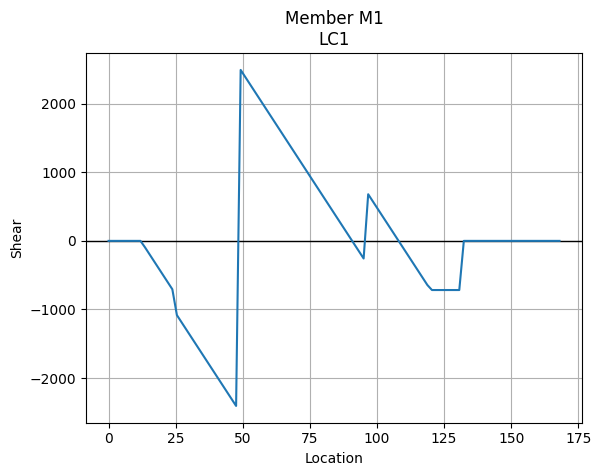

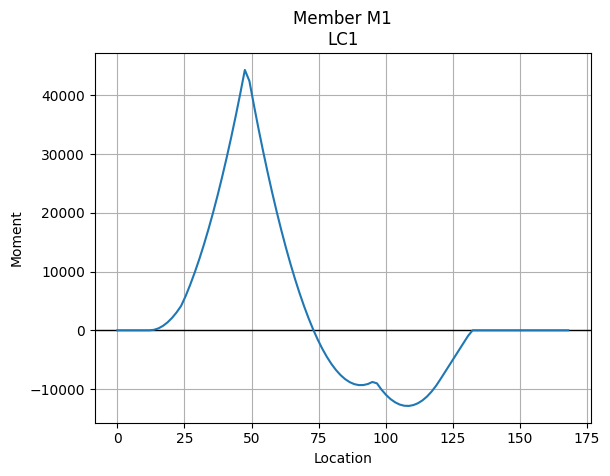

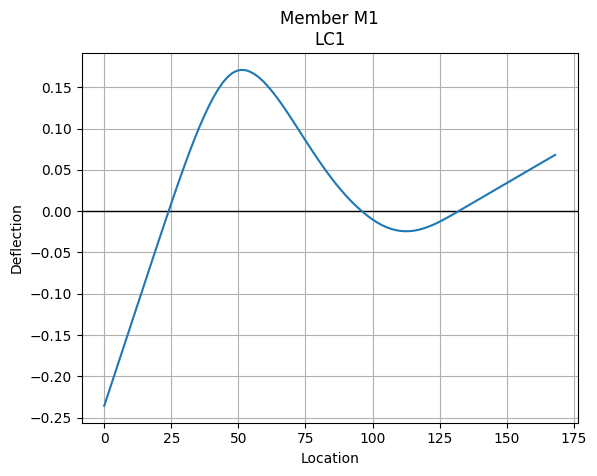

In [60]:
# This is me completing the workbook
# Create a model
beam_model_task03 = FEModel3D()

# Add a material
E = 58000  # Modulus of elasticity (ksi)
G = 23000       # Shear modulus of elasticity (ksi)
rho = 7e-4   # Density
nu = 0.31        # Poisson's ratio
beam_model_task03.add_material('Tungsten', E, G, nu, rho)

# Add nodes
beam_model_task03.add_node("node1", 0, 0, 0)
beam_model_task03.add_node("node2", 168, 0, 0)
beam_model_task03.add_node("node3", 24, 0, 0)
beam_model_task03.add_node("node4", 96, 0, 0)
beam_model_task03.add_node("node5", 132, 0, 0)

# Add members
beam_model_task03.add_member("M1", "node1", "node2", "Tungsten", Iy = 20e6, Iz = 1200, J=30e3, A=1500)

# Define supports
beam_model_task03.def_support("node3", True, True, True, True, True, False)
beam_model_task03.def_support("node4", False, True, True, True, True, False)
beam_model_task03.def_support("node5", False, True, True, True, True, False)

# Load combinations
beam_model_task03.add_load_combo("LC1", {"D": 1.0, "L": 1.0})

# Add member loads
beam_model_task03.add_member_dist_load("M1", "Fy", w1=-60, w2=-60, x1=12, x2=120, case="L")

beam_model_task03.add_member_pt_load("M1", "Fy", P=5000, x=48, case="L")

# Display member forces
beam_model_task03.analyze()

# Display node reactions
print(f"Left Support Reaction: {round(beam_model_task03.Nodes['node3'].RxnFY['LC1'], 2)} lbs")
print(f"Middle Support Reaction: {round(beam_model_task03.Nodes['node4'].RxnFY['LC1'], 2)} lbs")
print(f"Right Support Reaction: {round(beam_model_task03.Nodes['node5'].RxnFY['LC1'], 2)} lbs")

# Plot Shear Diagram
beam_model_task03.Members['M1'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)

# Plot Moment Diagram
beam_model_task03.Members['M1'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)

# Plot the Deflection
beam_model_task03.Members['M1'].plot_deflection(Direction="dy", combo_name="LC1", n_points=100)